In this project, we'll work with data from the S&P500 Index. The S&P500 is a stock market index. Before we get into what an index is, we'll need to start with the basics of the stock market.

We'll be using historical data on the price of the S&P500 Index to make predictions about future prices. Predicting whether an index goes up or down helps forecast how the stock market as a whole performs. Since stocks tend to correlate with how well the economy as a whole is performs, it can also help with economic forecasts.

We'll be working with a csv file containing index prices. Each row in the file contains a daily record of the price of the S&P500 Index from 1950 to 2015.

The columns of the dataset are:

* Date -- The date of the record.
* Open -- The opening price of the day (when trading starts).
* High -- The highest trade price during the day.
* Low -- The lowest trade price during the day.
* Close -- The closing price for the day (when trading is finished).
* Volume -- The number of shares traded.
* Adj Close -- The daily closing price, adjusted retroactively to include any corporate actions. Read more here.

We'll train the model with data from 1950-2012 and try to make predictions from 2013-2015.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
df =pd.read_csv('sphist.csv')

In [4]:
df['Date']=pd.to_datetime(df['Date'])
df = df.sort_values(by = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
16589,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66
16588,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
16587,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
16586,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
16585,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16590 entries, 16589 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       16590 non-null  datetime64[ns]
 1   Open       16590 non-null  float64       
 2   High       16590 non-null  float64       
 3   Low        16590 non-null  float64       
 4   Close      16590 non-null  float64       
 5   Volume     16590 non-null  float64       
 6   Adj Close  16590 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.0 MB


## Features Preparations

In [6]:
# calculate the average price from the past n trading day
def avg_ndays_stock_price(df, n):
    col_name = 'Avg_Price_' + str(n) + '_Day'
    for index, row in df.iterrows():
        start_index = index + (n - 1)
        if start_index not in df.index:
            df.loc[index, col_name] = 0
        else:
            # assign mean nday to column and round to 2 decimals
            df.loc[index, col_name] = round(df.loc[start_index:index, 'Close'].mean(),2)
    return df

In [7]:
# calculate the average stock volumes from the past n trading day
def avg_ndays_stock_volume(df, n):
    col_name = 'Avg_Volume_' + str(n) + '_Day'
    for index, row in df.iterrows():
        start_index = index + (n - 1)
        if start_index not in df.index:
            df.loc[index, col_name] = 0
        else:
            # assign mean nday to column, and round to 2 decimals
            df.loc[index, col_name] = round(df.loc[start_index:index, 'Volume'].mean(),2)
    return df

In [8]:
avg_ndays_stock_price(df, 5)
avg_ndays_stock_price(df, 30)
avg_ndays_stock_price(df, 365)
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close,Avg_Price_5_Day,Avg_Price_30_Day,Avg_Price_365_Day
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2090.23,2076.28,2035.91
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2088.31,2077.91,2036.23
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2080.46,2078.93,2036.51
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.77,2080.24,2036.87
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068,2080.10,2080.30,2037.20


In [9]:
avg_ndays_stock_volume(df, 5)
avg_ndays_stock_volume(df, 30)
avg_ndays_stock_volume(df, 365)
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close,Avg_Price_5_Day,Avg_Price_30_Day,Avg_Price_365_Day,Avg_Volume_5_Day,Avg_Volume_30_Day,Avg_Volume_365_Day
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2090.23,2076.28,2035.91,3.232372e+09,3.856341e+09,3.526090e+09
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2088.31,2077.91,2036.23,3.245514e+09,3.876979e+09,3.529468e+09
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2080.46,2078.93,2036.51,3.536224e+09,3.899603e+09,3.532802e+09
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.77,2080.24,2036.87,4.085838e+09,3.892405e+09,3.535838e+09
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068,2080.10,2080.30,2037.20,4.045596e+09,3.890250e+09,3.539304e+09


Avg_Price_365_Day and Avg_Volume_365_Day use 365 days of historical data and the dataset starts on 1950-01-03. Thus, any rows that fall before 1951-01-03 don't have enough historical data to compute all the indicators and need to be removed.

In [10]:
# Remove any rows from the DataFrame that occur before 1951-01-03
dt_mask = df['Date'] > dt.datetime(year = 1951, month=1, day=2)
df = df[dt_mask]
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Avg_Price_5_Day,Avg_Price_30_Day,Avg_Price_365_Day,Avg_Volume_5_Day,Avg_Volume_30_Day,Avg_Volume_365_Day
16339,1951-01-03,20.690001,20.690001,20.690001,20.690001,3370000.0,20.690001,20.51,19.84,0.0,3268000.0,2694666.67,0.0
16338,1951-01-04,20.870001,20.870001,20.870001,20.870001,3390000.0,20.870001,20.63,19.87,0.0,3358000.0,2732666.67,0.0
16337,1951-01-05,20.870001,20.870001,20.870001,20.870001,3390000.0,20.870001,20.73,19.91,0.0,3324000.0,2778666.67,0.0
16336,1951-01-08,21.000000,21.000000,21.000000,21.000000,2780000.0,21.000000,20.84,19.93,0.0,3192000.0,2780333.33,0.0
16335,1951-01-09,21.120001,21.120001,21.120001,21.120001,3800000.0,21.120001,20.91,19.96,0.0,3346000.0,2819666.67,0.0


In [11]:
# remove any rows with NaN values
df.dropna(axis=0)
df.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Adj Close             0
Avg_Price_5_Day       0
Avg_Price_30_Day      0
Avg_Price_365_Day     0
Avg_Volume_5_Day      0
Avg_Volume_30_Day     0
Avg_Volume_365_Day    0
dtype: int64

We generate two new dataframes train and test to use in making our algorithm. train should contain any rows in the data with a date less than 2013-01-01. test should contain any rows with a date greater than or equal to 2013-01-01.

In [12]:
date = dt.datetime(year=2013, month = 1, day = 1)
train = df[df['Date'] < date]
test = df[df['Date'] >= date]

In [13]:
train.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Avg_Price_5_Day,Avg_Price_30_Day,Avg_Price_365_Day,Avg_Volume_5_Day,Avg_Volume_30_Day,Avg_Volume_365_Day
16339,1951-01-03,20.690001,20.690001,20.690001,20.690001,3370000.0,20.690001,20.51,19.84,0.0,3268000.0,2694666.67,0.0
16338,1951-01-04,20.870001,20.870001,20.870001,20.870001,3390000.0,20.870001,20.63,19.87,0.0,3358000.0,2732666.67,0.0
16337,1951-01-05,20.870001,20.870001,20.870001,20.870001,3390000.0,20.870001,20.73,19.91,0.0,3324000.0,2778666.67,0.0
16336,1951-01-08,21.000000,21.000000,21.000000,21.000000,2780000.0,21.000000,20.84,19.93,0.0,3192000.0,2780333.33,0.0
16335,1951-01-09,21.120001,21.120001,21.120001,21.120001,3800000.0,21.120001,20.91,19.96,0.0,3346000.0,2819666.67,0.0


In [14]:
test.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Avg_Price_5_Day,Avg_Price_30_Day,Avg_Price_365_Day,Avg_Volume_5_Day,Avg_Volume_30_Day,Avg_Volume_365_Day
738,2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,4.202600e+09,1462.420044,1425.79,1417.68,1327.91,2.989764e+09,3.276632e+09,3.862480e+09
737,2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,3.829730e+09,1459.369995,1433.70,1420.09,1328.22,3.298704e+09,3.291797e+09,3.859719e+09
736,2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,3.424290e+09,1466.469971,1443.38,1422.71,1328.56,3.417526e+09,3.299034e+09,3.859449e+09
735,2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,3.304970e+09,1461.890015,1455.27,1425.08,1328.90,3.593184e+09,3.320297e+09,3.858814e+09
734,2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,3.601600e+09,1457.150024,1461.46,1426.68,1329.24,3.672638e+09,3.390185e+09,3.857703e+09


## Linear Regression Model

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
features = ['Avg_Price_5_Day', 'Avg_Price_30_Day', 'Avg_Price_365_Day']
lr = LinearRegression()
lr.fit(train[features], train['Close'])
predictions = lr.predict(test[features])
MAE = mean_absolute_error(predictions,test['Close'])
MAE

11.799457294240616

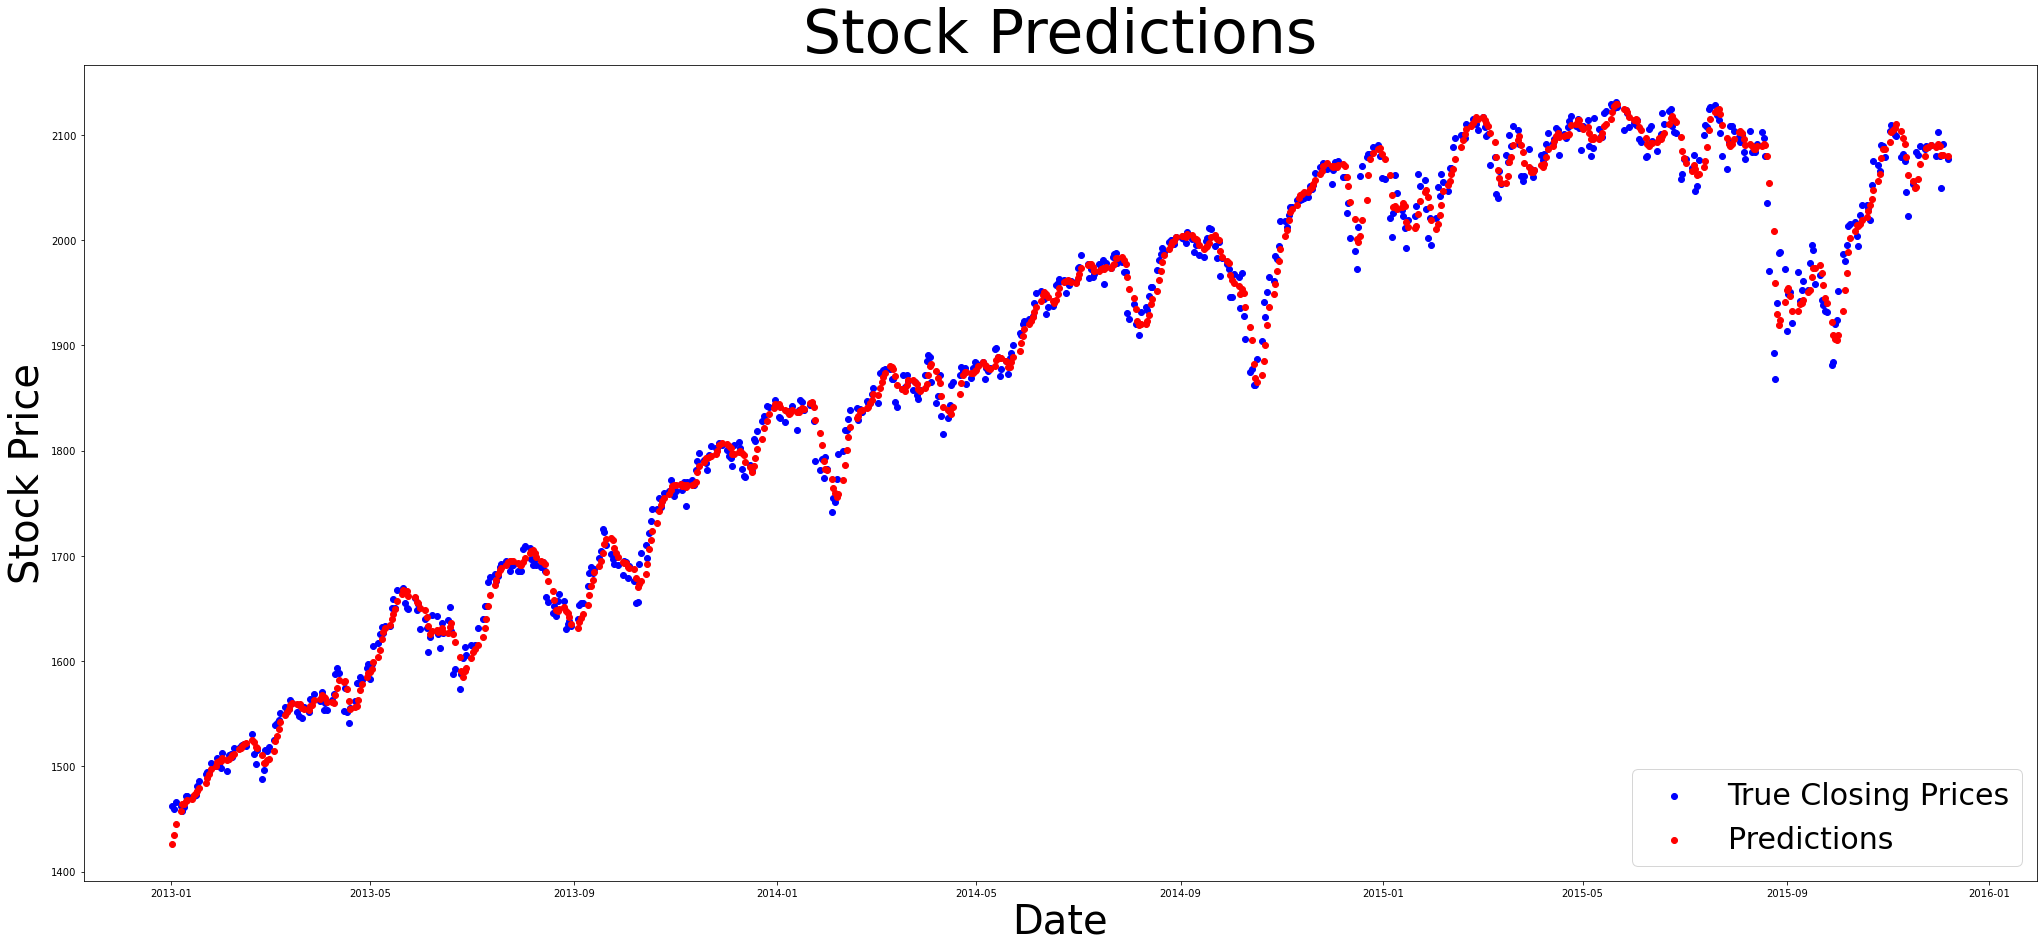

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(35,15))
plt.scatter(test['Date'], test['Close'], c='b', label ="True Closing Prices")
plt.scatter(test['Date'], predictions, c='r', label ="Predictions")
plt.title('Stock Predictions', fontsize=60)
plt.xlabel('Date', fontsize=40)
plt.ylabel('Stock Price', fontsize=40)
plt.legend(loc='lower right', prop={'size': 30})
plt.show()

In [30]:
features = ['Avg_Price_5_Day', 'Avg_Price_30_Day', 'Avg_Price_365_Day', 'Avg_Volume_5_Day', 'Avg_Price_30_Day', 'Avg_Price_365_Day']
lr = LinearRegression()
lr.fit(train[features], train['Close'])
predictions = lr.predict(test[features])
MAE = mean_absolute_error(predictions,test['Close'])
MAE

11.800438699702616

Adding the average volume of stock doesn't increase the accuary of the prediction.

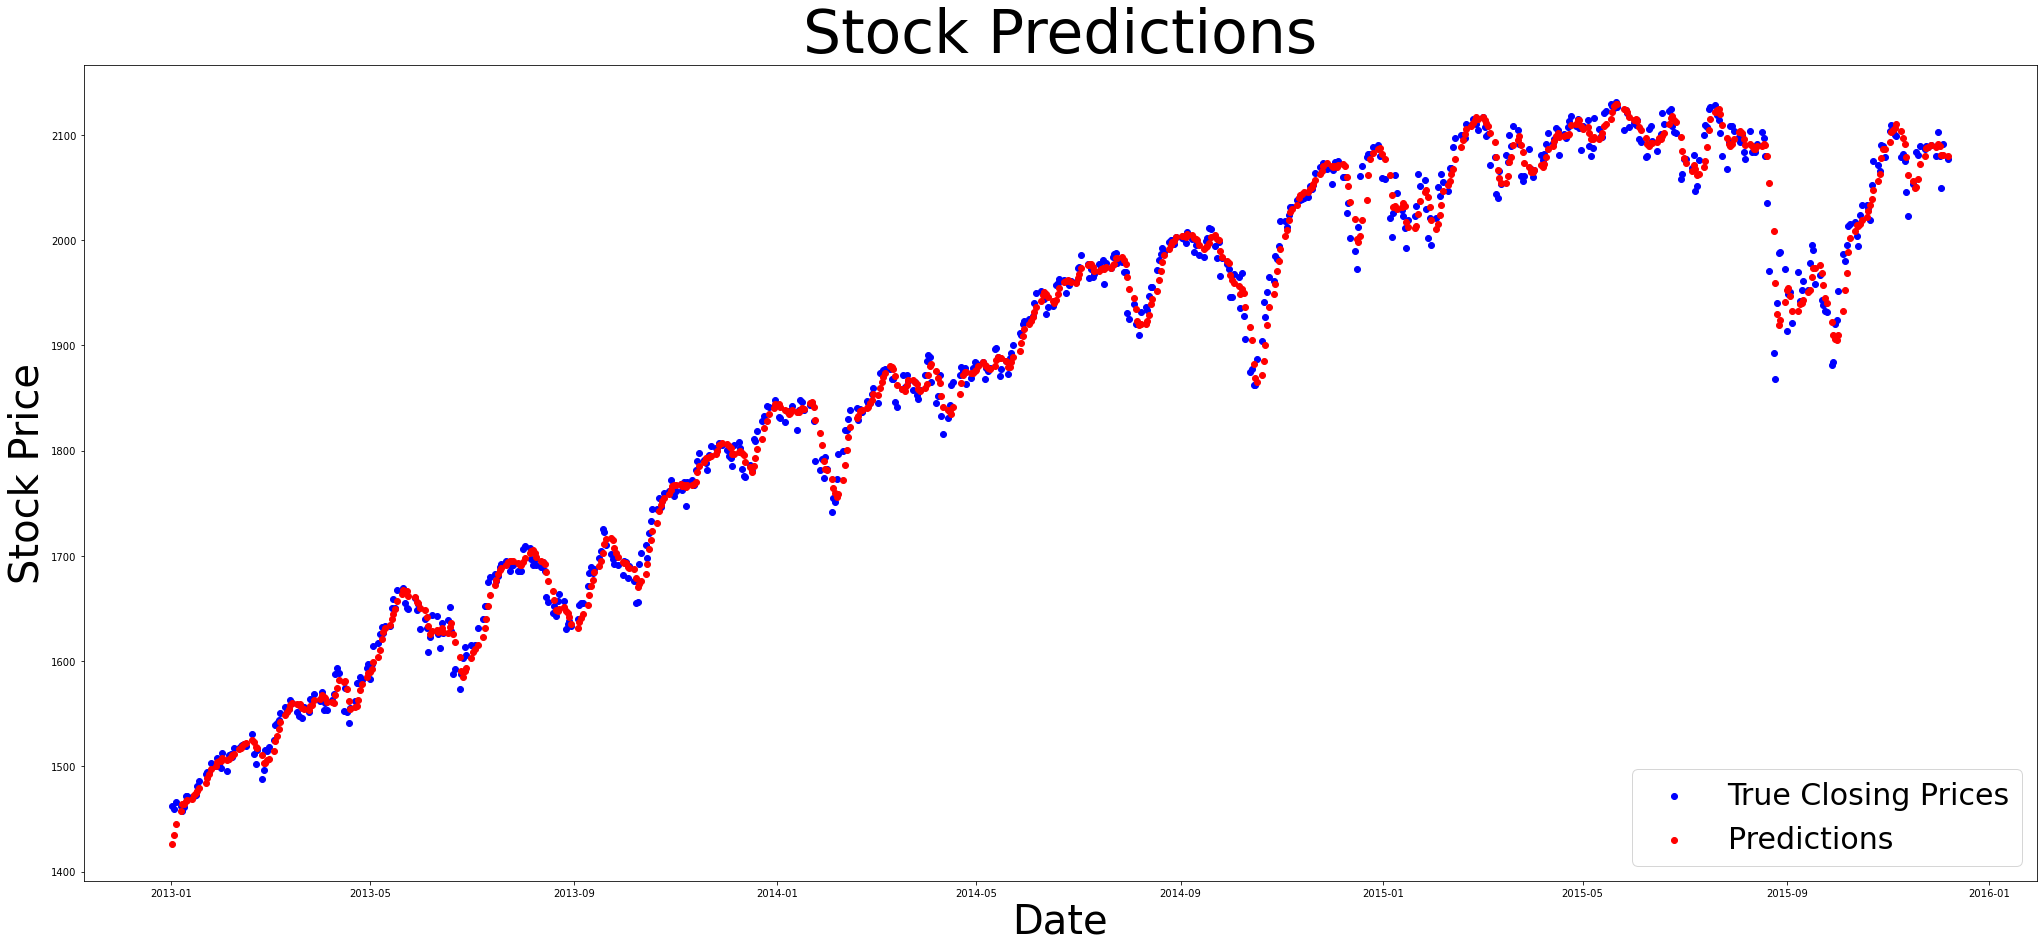

In [31]:
plt.figure(figsize=(35,15))
plt.scatter(test['Date'], test['Close'], c='b', label ="True Closing Prices")
plt.scatter(test['Date'], predictions, c='r', label ="Predictions")
plt.title('Stock Predictions', fontsize=60)
plt.xlabel('Date', fontsize=40)
plt.ylabel('Stock Price', fontsize=40)
plt.legend(loc='lower right', prop={'size': 30})
plt.show()